# Consiguiendo los datos

### Conseguir el link

In [1]:
url = "https://import.cdn.thinkific.com/220744/courses/1648061/pokemon_dataset-220322-181028.zip"

### Descargar el archivo

In [2]:
import urllib.request as Req

In [3]:
Req.urlretrieve(url, "pokemon_dataset.zip")  #Aquí ponemos la ruta donde queremos que se aloje

('pokemon_dataset.zip', <http.client.HTTPMessage at 0x20bf24cc8b0>)

### Descromprimir el archivo

In [4]:
from zipfile import ZipFile 

In [5]:
pokemon_zip = ZipFile("pokemon_dataset.zip")

In [6]:
pokemon_zip.filelist

[<ZipInfo filename='pokedex_mastermind.csv' compress_type=deflate filemode='-rw-r--r--' file_size=163483 compress_size=35537>]

In [7]:
archivo = pokemon_zip.open("pokedex_mastermind.csv")

### Construir un data frame

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv(archivo, index_col = [0]) #Recordemos siempre modificar la columna inicial

In [10]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [11]:
df.tail()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1040,896,Glastrier,8,Sub Legendary,ICE,NaN,2.2,1763.696000,100,145,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,8,Sub Legendary,GHOST,NaN,2.0,98.105590,100,65,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,8,Legendary,PSYCHIC,Grass,1.1,16.975574,100,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,8,Legendary,PSYCHIC,Ice,2.4,1783.758042,100,165,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1044,898,Calyrex Shadow Rider,8,Legendary,PSYCHIC,Ghost,2.4,118.167632,100,85,...,1.0,1.0,0.5,1.0,1.0,4.0,1.0,4.0,1.0,1.0


# Limpieza y Manipulación de datos

##  Quitar datos duplicados o irrelevantes

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1040    False
1041    False
1042    False
1043    False
1044    False
Length: 1045, dtype: bool

In [13]:
df.duplicated().any() #Esto nos trae False si nada es duplicado

False

In [14]:
#También podemos usar
df.duplicated().unique() #Este nos trae los valores unicos

array([False])

In [15]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

## Arreglar errores estructurales

In [16]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [17]:
df.sample()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
577,482,Azelf,4,Sub Legendary,PSYCHIC,NaN,0.3,0.661386,75,125,...,0.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0


In [18]:
df.head(50)

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,Charmeleon,1,Normal,FIRE,NaN,1.1,41.887780,58,64,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,Charizard,1,Normal,FIRE,Flying,1.7,199.518110,78,84,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,6,Charizard XMega Charizard X,1,Normal,FIRE,Dragon,1.7,243.610510,78,130,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,6,Charizard YMega Charizard Y,1,Normal,FIRE,Flying,1.7,221.564310,78,104,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,7,Squirtle,1,Normal,WATER,NaN,0.5,19.841580,44,48,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


Podemos ver varias observaciones en la muestra de los datos, iremos creando un índice para cada cosa que encontremos

### No se muestran todas la columnas

Lo que haremos para mejorar esto es realizar 2 dataframe, uno para los datos y otro para las debilidades

In [19]:
weakness = df[['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy']]

In [20]:
weakness.head()

,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Ahora lo que haremos una vez las tenemos separadas, será dividir los data frames, en este caso uno de weakness y el original quitarle las columnas que dejamos en weakness

In [21]:
cols= ['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy']

Aquí ya agarramos las columnas que queremos eliminar del otro data frame, las agrupamos en uns lista para acortar código

In [22]:
df.drop(cols, axis=1, inplace=True) #Recuerda usar el inplace solo si estás seguro del movimiento

Recordemos que inplace es para hacer el cambio permanente en el dataframe y que axis=1 es para agarrar la columna 1, osea el eje cartesiano 

In [23]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5%
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5%
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5%
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5%
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5%


Como podemos ver, en efecto solo podemos llegar hasta percentage_male, hemos modificado el dataframe

Pero otra cosa que nos percatamos, es que tenemos redundancia, al separarlo ahora separamos weakness del data frame y podemos notar que sería redundante dejar el against si estamos diciendo en el mismo dataframe que son los weakness

In [24]:
weakness.head()

,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Así que lo que haremos a continuación es sustituir el "against_" por un string vacío

In [25]:
weakness.columns = [ x.replace("against_", "") for x in weakness.columns]

In [26]:
weakness.head()

,normal,fire,water,electric,grass,ice,fight,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Como podemos ver, ya hemos hecho la modificación

### percentage_male quitar % y pasarlo a float

Primero revisaremos que todos los valores de esa columna si presenten el mismo error, para poder aplicar una función sobre ellos y estar seguros que todos queden igual

In [27]:
df["percentage_male"].unique()

array(['87.5%', '50.0%', '0.0%', '100.0%', '25.0%', '75.0%'], dtype=object)

Como podemos ver, en efecto todos presentan el mismo caso

In [28]:
df["percentage_male"].str.replace("%","").apply(float) #Aquí ya reemplazamos y a la vez lo hicimos float

0       87.5
1       87.5
2       87.5
3       87.5
4       87.5
        ... 
1040     0.0
1041     0.0
1042     0.0
1043     0.0
1044     0.0
Name: percentage_male, Length: 1045, dtype: float64

Ya una vez que estamos seguros del cambio, ahora si vamos a reemplazar la columna 

In [29]:
df["percentage_male"] = df["percentage_male"].str.replace("%","").apply(float) #Aquí ya reemplazamos y a la vez lo hicimos float

In [30]:
df["percentage_male"].unique()

array([ 87.5,  50. ,   0. , 100. ,  25. ,  75. ])

### Todas las variables de texto deben estar en minusculas

In [31]:
df.select_dtypes(include=[object])

,name,status,type_1,type_2
0,Bulbasaur,Normal,GRASS,Poison
1,Ivysaur,Normal,GRASS,Poison
2,Venusaur,Normal,GRASS,Poison
3,VenusaurMega Venusaur,Normal,GRASS,Poison
4,Charmander,Normal,FIRE,NaN
...,...,...,...,...
1040,Glastrier,Sub Legendary,ICE,NaN
1041,Spectrier,Sub Legendary,GHOST,NaN
1042,Calyrex,Legendary,PSYCHIC,Grass
1043,Calyrex Ice Rider,Legendary,PSYCHIC,Ice


Con ese código nos traemos todos lo del dataframe que sea tipo object, osea str

In [32]:
df.select_dtypes(include=[object]).columns

Index(['name', 'status', 'type_1', 'type_2'], dtype='object')

In [33]:
cols = ["status", "type_1","type_2"]

In [34]:
df[cols].apply(lambda x: x.str.lower())

,status,type_1,type_2
0,normal,grass,poison
1,normal,grass,poison
2,normal,grass,poison
3,normal,grass,poison
4,normal,fire,NaN
...,...,...,...
1040,sub legendary,ice,NaN
1041,sub legendary,ghost,NaN
1042,legendary,psychic,grass
1043,legendary,psychic,ice


Ya que vemos que el cambio está correcto, ahora si lo reemplazaremos en nuestro dataframe
OJO: recuerda que en los lambda no se usa inplace="True", así que tendremos que sustituirlo directamente

In [35]:
df[cols] = df[cols].apply(lambda x: x.str.lower())

In [36]:
df.select_dtypes(include=object)

,name,status,type_1,type_2
0,Bulbasaur,normal,grass,poison
1,Ivysaur,normal,grass,poison
2,Venusaur,normal,grass,poison
3,VenusaurMega Venusaur,normal,grass,poison
4,Charmander,normal,fire,NaN
...,...,...,...,...
1040,Glastrier,sub legendary,ice,NaN
1041,Spectrier,sub legendary,ghost,NaN
1042,Calyrex,legendary,psychic,grass
1043,Calyrex Ice Rider,legendary,psychic,ice


Listo, cambio realizado y verificado

### weight_pounds pasarlo a sistema métrico

In [37]:
df["weight_pounds"]

0         15.211878
1         28.660060
2        220.462000
3        342.818410
4         18.739270
           ...     
1040    1763.696000
1041      98.105590
1042      16.975574
1043    1783.758042
1044     118.167632
Name: weight_pounds, Length: 1045, dtype: float64

Como vemos ahora habrá que convertirlo a kilos para tener todo en sistema métrico

In [38]:
df["weight_kg"] = df["weight_pounds"] * 0.453592

In [39]:
df["weight_kg"]

0         6.899986
1        12.999974
2        99.999800
3       155.499688
4         8.499983
           ...    
1040    799.998396
1041     44.499911
1042      7.699985
1043    809.098378
1044     53.599893
Name: weight_kg, Length: 1045, dtype: float64

Hay que redondearlo para que se vea mas estético

In [40]:
df["weight_kg"] = df["weight_kg"].round(2)

In [41]:
df["weight_kg"]

0         6.9
1        13.0
2       100.0
3       155.5
4         8.5
        ...  
1040    800.0
1041     44.5
1042      7.7
1043    809.1
1044     53.6
Name: weight_kg, Length: 1045, dtype: float64

### Los mega tienen el nombre mal

In [42]:
df["name"][:50]

0                       Bulbasaur
1                         Ivysaur
2                        Venusaur
3           VenusaurMega Venusaur
4                      Charmander
5                      Charmeleon
6                       Charizard
7     Charizard XMega Charizard X
8     Charizard YMega Charizard Y
9                        Squirtle
10                      Wartortle
11                      Blastoise
12        BlastoiseMega Blastoise
13                       Caterpie
14                        Metapod
15                     Butterfree
16                         Weedle
17                         Kakuna
18                       Beedrill
19          BeedrillMega Beedrill
20                         Pidgey
21                      Pidgeotto
22                        Pidgeot
23            PidgeotMega Pidgeot
24                        Rattata
25                 Alolan Rattata
26                       Raticate
27                Alolan Raticate
28                        Spearow
29            

In [43]:
df["name"].str.contains("Mega")

0       False
1       False
2       False
3        True
4       False
        ...  
1040    False
1041    False
1042    False
1043    False
1044    False
Name: name, Length: 1045, dtype: bool

Esto trae sólo booleanos, hay que pedirle en que nos traiga gráficamente de una manera sencilla

In [44]:
df[df["name"].str.contains("Mega")]

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5,155.5
7,6,Charizard XMega Charizard X,1,normal,fire,dragon,1.7,243.610510,78,130,111,130,85,100,45.0,87.5,110.5
8,6,Charizard YMega Charizard Y,1,normal,fire,flying,1.7,221.564310,78,104,78,159,115,100,45.0,87.5,100.5
12,9,BlastoiseMega Blastoise,1,normal,water,NaN,1.6,222.887082,79,103,120,135,115,78,45.0,87.5,101.1
19,15,BeedrillMega Beedrill,1,normal,bug,poison,1.4,89.287110,65,150,40,15,80,145,45.0,50.0,40.5
23,18,PidgeotMega Pidgeot,1,normal,normal,flying,2.2,111.333310,83,80,80,135,80,121,45.0,50.0,50.5
84,65,AlakazamMega Alakazam,1,normal,psychic,NaN,1.2,105.821760,55,50,65,175,105,150,50.0,75.0,48.0
106,80,SlowbroMega Slowbro,1,normal,water,psychic,2.0,264.554400,95,75,180,130,80,30,75.0,50.0,120.0
125,94,GengarMega Gengar,1,normal,ghost,poison,1.4,89.287110,60,65,80,170,95,130,45.0,50.0,40.5
150,115,KangaskhanMega Kangaskhan,1,normal,normal,NaN,2.2,220.462000,105,125,100,60,100,100,45.0,0.0,100.0


In [45]:
df[df["name"].str.contains("Mega")]["name"]

3            VenusaurMega Venusaur
7      Charizard XMega Charizard X
8      Charizard YMega Charizard Y
12         BlastoiseMega Blastoise
19           BeedrillMega Beedrill
23             PidgeotMega Pidgeot
84           AlakazamMega Alakazam
106            SlowbroMega Slowbro
125              GengarMega Gengar
150      KangaskhanMega Kangaskhan
164              PinsirMega Pinsir
168          GyaradosMega Gyarados
182      AerodactylMega Aerodactyl
194          Mewtwo XMega Mewtwo X
195          Mewtwo YMega Mewtwo Y
199                       Meganium
227          AmpharosMega Ampharos
256            SteelixMega Steelix
261              ScizorMega Scizor
264        HeracrossMega Heracross
281          HoundoomMega Houndoom
301        TyranitarMega Tyranitar
308          SceptileMega Sceptile
312          BlazikenMega Blaziken
316          SwampertMega Swampert
341        GardevoirMega Gardevoir
362            SableyeMega Sableye
364              MawileMega Mawile
368              Agg

In [46]:
len (df[df["name"].str.contains("Mega")]["name"])

49

In [47]:
nombres = df[df["name"].str.contains("Mega")]["name"]

In [48]:
nombres[3]

'VenusaurMega Venusaur'

Para esto estaremos usando un método conocido como regex, para encontrar patrones

In [49]:
#Pat = patrón deseado a buscar
pat = "^.*(?=(Mega))"

In [50]:
nombres.str.replace(pat,"",regex=True)

3         Mega Venusaur
7      Mega Charizard X
8      Mega Charizard Y
12       Mega Blastoise
19        Mega Beedrill
23         Mega Pidgeot
84        Mega Alakazam
106        Mega Slowbro
125         Mega Gengar
150     Mega Kangaskhan
164         Mega Pinsir
168       Mega Gyarados
182     Mega Aerodactyl
194       Mega Mewtwo X
195       Mega Mewtwo Y
199            Meganium
227       Mega Ampharos
256        Mega Steelix
261         Mega Scizor
264      Mega Heracross
281       Mega Houndoom
301      Mega Tyranitar
308       Mega Sceptile
312       Mega Blaziken
316       Mega Swampert
341      Mega Gardevoir
362        Mega Sableye
364         Mega Mawile
368         Mega Aggron
371       Mega Medicham
374      Mega Manectric
384       Mega Sharpedo
389       Mega Camerupt
401        Mega Altaria
425        Mega Banette
431          Mega Absol
435         Mega Glalie
447      Mega Salamence
451      Mega Metagross
456         Mega Latias
458         Mega Latios
464       Mega R

In [51]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5,100.0
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5,8.5


Como podemos ver, no se modificó el dataframe, solo vimos cómo quedaría  

In [52]:
df["name"] = df["name"].str.replace(pat,"",regex=True)

In [53]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5,100.0
3,3,Mega Venusaur,1,normal,grass,poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5,8.5


In [54]:
df[df["name"].str.contains("Mega")]["name"]

3         Mega Venusaur
7      Mega Charizard X
8      Mega Charizard Y
12       Mega Blastoise
19        Mega Beedrill
23         Mega Pidgeot
84        Mega Alakazam
106        Mega Slowbro
125         Mega Gengar
150     Mega Kangaskhan
164         Mega Pinsir
168       Mega Gyarados
182     Mega Aerodactyl
194       Mega Mewtwo X
195       Mega Mewtwo Y
199            Meganium
227       Mega Ampharos
256        Mega Steelix
261         Mega Scizor
264      Mega Heracross
281       Mega Houndoom
301      Mega Tyranitar
308       Mega Sceptile
312       Mega Blaziken
316       Mega Swampert
341      Mega Gardevoir
362        Mega Sableye
364         Mega Mawile
368         Mega Aggron
371       Mega Medicham
374      Mega Manectric
384       Mega Sharpedo
389       Mega Camerupt
401        Mega Altaria
425        Mega Banette
431          Mega Absol
435         Mega Glalie
447      Mega Salamence
451      Mega Metagross
456         Mega Latias
458         Mega Latios
464       Mega R

In [55]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5,100.0
3,3,Mega Venusaur,1,normal,grass,poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5,8.5


Antes de terminar comprobamos que acabamos con los datos estructurales, pero que nos quedamos con la clumna weight_pounds 

In [56]:
df.drop("weight_pounds", axis=1, inplace=True)

In [57]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,80,82,83,100,100,80,45.0,87.5,100.0
3,3,Mega Venusaur,1,normal,grass,poison,2.4,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,39,52,43,60,50,65,45.0,87.5,8.5


## Filtrar Outliers

In [58]:
df.describe()

,pokedex_number,generation,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1027.000000,1045.000000,1044.000000
mean,440.769378,4.098565,1.374067,70.067943,80.476555,74.670813,73.031579,72.298565,68.807656,92.739046,45.789474,71.216571
std,262.517231,2.272788,3.353349,26.671411,32.432728,31.259462,32.745857,28.098943,30.210094,75.878404,27.631585,132.259911
min,1.000000,1.000000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,0.100000
25%,212.000000,2.000000,0.600000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,50.000000,9.000000
50%,436.000000,4.000000,1.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,50.000000,29.500000
75%,670.000000,6.000000,1.600000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,50.000000,70.500000
max,898.000000,8.000000,100.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,255.000000,100.000000,999.900000


## Lidiar con NANs

In [59]:
df.isna()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1041,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1042,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1043,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
df.isna().any()

pokedex_number     False
name               False
generation         False
status             False
type_1             False
type_2              True
height_m           False
hp                 False
attack             False
defense            False
sp_attack          False
sp_defense         False
speed              False
catch_rate          True
percentage_male    False
weight_kg           True
dtype: bool

Con esta manera podemos saber sencillamente qué columnas cuentan al menos con un NAN

In [61]:
len (df[df["type_2"].isna()])

492

In [62]:
len(df)

1045

In [63]:
df["type_2"].unique()

array(['poison', nan, 'flying', 'dragon', 'normal', 'psychic', 'steel',
       'ground', 'fairy', 'grass', 'fighting', 'electric', 'ice', 'dark',
       'ghost', 'rock', 'water', 'fire', 'bug'], dtype=object)

   Vemos qué tipo podemos poner para no confundir con los demás, en este caso podemos poner que ninguno sin problema

In [64]:
df["type_2"].fillna("none", inplace=True)

Ahora vamos con el siguiente elemento en la lista

In [65]:
df[df["catch_rate"].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
69,52,Galarian Meowth,1,normal,steel,none,0.4,50,65,55,40,40,40,NaN,0.0,7.5
100,77,Galarian Ponyta,1,normal,psychic,none,0.8,50,85,55,65,65,90,NaN,0.0,24.0
102,78,Galarian Rapidash,1,normal,psychic,fairy,1.7,65,100,70,80,80,105,NaN,0.0,80.0
111,83,Galarian Farfetch'd,1,normal,fighting,none,0.8,52,95,55,58,62,55,NaN,0.0,42.0
144,110,Galarian Weezing,1,normal,poison,fairy,3.0,65,90,120,85,70,60,NaN,0.0,16.0
158,122,Galarian Mr. Mime,1,normal,psychic,ice,1.4,50,65,65,90,90,100,NaN,0.0,56.8
273,222,Galarian Corsola,2,normal,ghost,none,0.6,60,55,100,65,100,30,NaN,0.0,0.5
320,263,Galarian Zigzagoon,3,normal,dark,normal,0.4,38,30,41,30,41,60,NaN,0.0,17.5
322,264,Galarian Linoone,3,normal,dark,normal,0.5,78,70,61,50,61,100,NaN,0.0,32.5
654,554,Galarian Darumaka,5,normal,ice,none,0.7,70,90,45,15,45,50,NaN,0.0,40.0


Para no dejar sin ningún valor, vamos a hacer un estimado, sacanado la media de atrapabilidad de pokes normales y de pokes legendarios, para ponerles el valor y no dejar sin nada el catch rate teniendo un valor aproximado

In [66]:
media_normales = df[df["status"] == "normal"]["catch_rate"].mean()
media_legendarios = df[df["status"] == "legendary"]["catch_rate"].mean()

In [67]:
media_normales

103.46400885935769

In [68]:
media_legendarios

23.923076923076923

Hay que ver ahora que esta media si sea algo razonable

In [69]:
df.describe()["catch_rate"]

count    1027.000000
mean       92.739046
std        75.878404
min         3.000000
25%        45.000000
50%        60.000000
75%       127.000000
max       255.000000
Name: catch_rate, dtype: float64

In [70]:
sin_datos = df["catch_rate"].isna()

son_legendarios = df["status"] == "legendary"
son_normales = df["status"] == "normal"

In [71]:
df.loc[sin_datos & son_legendarios, "catch_rate"] = media_legendarios
df.loc[sin_datos & son_normales, "catch_rate"] = media_normales

In [72]:
df["catch_rate"].isna().any()

False

In [73]:
df[df["weight_kg"].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
1033,890,Eternatus Eternamax,8,legendary,poison,dragon,100.0,255,115,250,125,250,130,23.923077,0.0,NaN


Al ser sólo un valor estará más sencillo y podemos buscar fácilmente el dato faltante en internet y asignarlo con una variable

In [74]:
peso = 950

pokemon = df["name"] == "Eternatus Eternamax"

In [75]:
df.loc[pokemon, "weight_kg"] = peso

In [79]:
df.loc[pokemon]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
1033,890,Eternatus Eternamax,8,legendary,poison,dragon,100.0,255,115,250,125,250,130,23.923077,0.0,950.0


In [77]:
df.isna().any()

pokedex_number     False
name               False
generation         False
status             False
type_1             False
type_2             False
height_m           False
hp                 False
attack             False
defense            False
sp_attack          False
sp_defense         False
speed              False
catch_rate         False
percentage_male    False
weight_kg          False
dtype: bool

## Validar nuestros datos

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   1045 non-null   int64  
 1   name             1045 non-null   object 
 2   generation       1045 non-null   int64  
 3   status           1045 non-null   object 
 4   type_1           1045 non-null   object 
 5   type_2           1045 non-null   object 
 6   height_m         1045 non-null   float64
 7   hp               1045 non-null   int64  
 8   attack           1045 non-null   int64  
 9   defense          1045 non-null   int64  
 10  sp_attack        1045 non-null   int64  
 11  sp_defense       1045 non-null   int64  
 12  speed            1045 non-null   int64  
 13  catch_rate       1045 non-null   float64
 14  percentage_male  1045 non-null   float64
 15  weight_kg        1045 non-null   float64
dtypes: float64(4), int64(8), object(4)
memory usage: 138.8+ KB


# EDA

## ¿Cuál es el tipo de Pokémon más común?

In [80]:
df["type_1"].value_counts()

water       134
normal      115
grass        91
bug          81
psychic      81
fire         65
electric     62
rock         60
dark         46
ghost        42
fighting     42
poison       41
ground       41
dragon       41
ice          37
steel        36
fairy        22
flying        8
Name: type_1, dtype: int64

Aquí podríamos decir que el tipo que más hay es el agua, pero solo estamos viendo el primer tipo, nos falta el segundo...

In [81]:
pd.pivot_table(df, index ="type_1")

,attack,catch_rate,defense,generation,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg
type_1,,,,,,,,,,,,
bug,71.074074,112.444444,71.802469,3.814815,0.896296,57.024691,46.141975,399.691358,56.382716,65.074074,63.259259,33.954321
dark,81.934783,95.368000,66.391304,4.478261,1.184783,70.065217,45.923913,476.260870,71.086957,68.369565,76.695652,58.034783
dragon,107.024390,31.756098,83.926829,4.609756,2.243902,85.243902,36.585366,549.219512,91.731707,84.097561,84.341463,127.109756
electric,74.983871,92.491355,66.241935,4.338710,0.969355,62.241935,37.701613,474.967742,89.548387,71.661290,86.758065,37.827419
fairy,68.090909,110.860140,70.545455,4.954545,0.927273,72.954545,31.818182,541.772727,78.954545,89.181818,59.545455,40.445455
fighting,102.928571,83.509216,73.666667,4.761905,1.319048,72.928571,58.035714,499.809524,57.333333,68.214286,71.333333,78.411905
fire,85.400000,71.692308,68.107692,3.892308,1.204615,69.430769,63.461538,401.923077,86.415385,71.292308,74.369231,65.020000
flying,75.125000,88.250000,64.375000,6.750000,1.112500,69.625000,62.500000,752.750000,73.875000,70.000000,87.000000,41.225000
ghost,73.976190,83.987238,79.952381,4.833333,1.230952,64.809524,40.476190,549.976190,83.476190,78.809524,63.047619,63.888095


Aquí estamos trayendo la media acorde al tipo

Claramente aquí no nos sirve del todo la info, habríamos de...

In [87]:
pd.pivot_table(df, index ="type_1", #Aquí pedimos que valores nos traerá de indice
                   columns="type_2",
                   values= "name", #Aquí le pedimos que solo nos separe nombre de tipos 
                   aggfunc= lambda x: x.value_counts().count() ) #aquí hacemos la agregate function

type_2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,none,normal,poison,psychic,rock,steel,water
type_1,,,,,,,,,,,,,,,,,,,
bug,NaN,NaN,NaN,4.0,2.0,4.0,2.0,14.0,1.0,6.0,2.0,NaN,19.0,NaN,12.0,2.0,3.0,7.0,3.0
dark,NaN,NaN,4.0,NaN,3.0,2.0,3.0,6.0,2.0,1.0,NaN,2.0,14.0,5.0,NaN,2.0,NaN,2.0,NaN
dragon,NaN,NaN,NaN,1.0,1.0,2.0,1.0,6.0,3.0,NaN,7.0,3.0,13.0,NaN,NaN,4.0,NaN,NaN,NaN
electric,NaN,2.0,2.0,NaN,2.0,NaN,1.0,6.0,1.0,1.0,NaN,2.0,34.0,2.0,3.0,1.0,NaN,4.0,1.0
fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,1.0,NaN
fighting,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,29.0,NaN,NaN,3.0,NaN,3.0,1.0
fire,2.0,1.0,2.0,NaN,NaN,7.0,NaN,7.0,2.0,NaN,3.0,NaN,34.0,2.0,NaN,2.0,1.0,1.0,1.0
flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,1.0
ghost,NaN,1.0,2.0,NaN,1.0,NaN,3.0,3.0,NaN,11.0,2.0,NaN,15.0,NaN,4.0,NaN,NaN,NaN,NaN


Ya tenemos la información que necesitamos pero, no es agradable de leer al usuario, apenas y se entiende 

Primero lo primero, hay que evitar los Nans a toda costa

In [88]:
pd.pivot_table(df, index ="type_1", 
                   columns="type_2",
                   values= "name", 
                   aggfunc= lambda x: x.value_counts().count(),
                   fill_value= 0) 

type_2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,none,normal,poison,psychic,rock,steel,water
type_1,,,,,,,,,,,,,,,,,,,
bug,0,0,0,4,2,4,2,14,1,6,2,0,19,0,12,2,3,7,3
dark,0,0,4,0,3,2,3,6,2,1,0,2,14,5,0,2,0,2,0
dragon,0,0,0,1,1,2,1,6,3,0,7,3,13,0,0,4,0,0,0
electric,0,2,2,0,2,0,1,6,1,1,0,2,34,2,3,1,0,4,1
fairy,0,0,0,0,0,0,0,2,0,0,0,0,19,0,0,0,0,1,0
fighting,0,2,0,0,0,0,0,2,1,0,0,1,29,0,0,3,0,3,1
fire,2,1,2,0,0,7,0,7,2,0,3,0,34,2,0,2,1,1,1
flying,0,0,2,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1
ghost,0,1,2,0,1,0,3,3,0,11,2,0,15,0,4,0,0,0,0


In [89]:
contar_tipos = pd.pivot_table(df, index ="type_1", 
                   columns="type_2",
                   values= "name", 
                   aggfunc= lambda x: x.value_counts().count(),
                   fill_value= 0) 

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

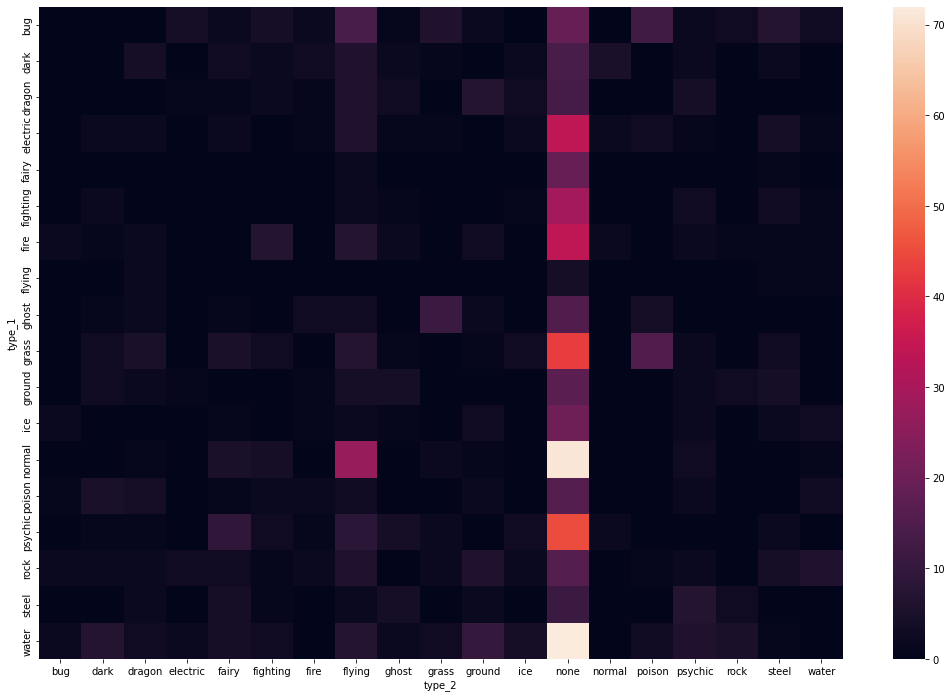

In [95]:
fig = plt.figure(figsize=(18, 12))

g = sns.heatmap(contar_tipos)

plt.show()

Evidentemente es muy inentendible, habrá que hacerlo de una manera más amena al usuario

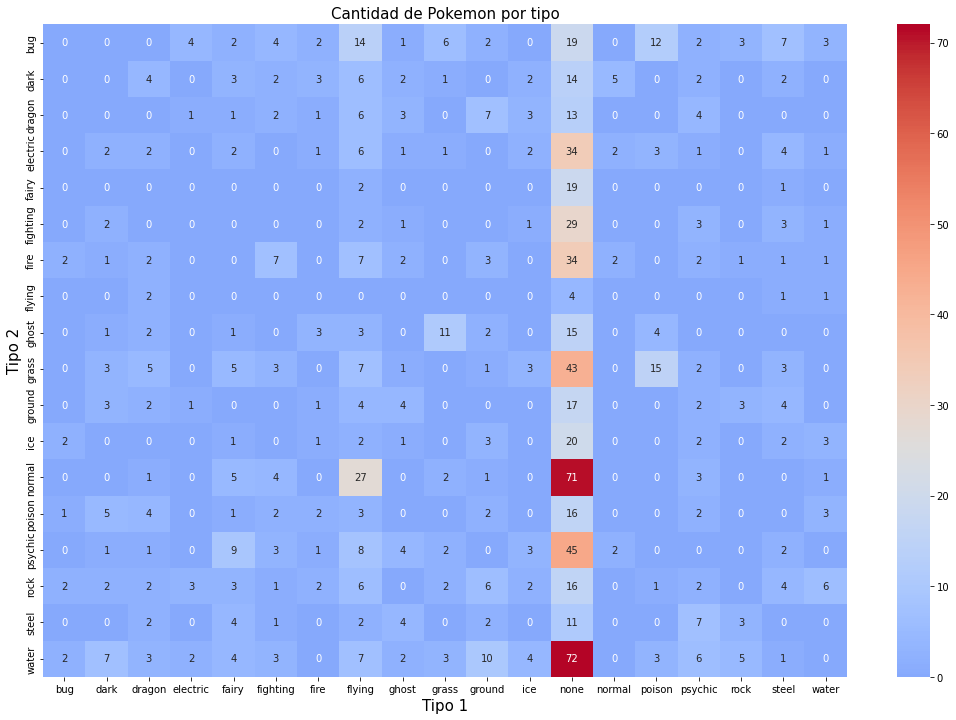

In [100]:
fig = plt.figure(figsize=(18, 12))

g = sns.heatmap(contar_tipos,
               cmap = "coolwarm", # color del mapa
               annot = True, # annot te pone el valor en el recuadro 
               center = 25 #El rango de colores a mostrar en el mapa de calor
               ) 

g.set_title("Cantidad de Pokemon por tipo" , fontsize=15 ) #asignación de titulo

g.set_xlabel("Tipo 1", fontsize = 15)  #Asignación de nombre de variables
g.set_ylabel("Tipo 2", fontsize = 15)

plt.show()

## ¿Cuántos Pokémon legendarios hay en cada generación?

In [103]:
df[df["status"] == "legendary"]["generation"].value_counts()

8    9
7    8
3    6
5    5
6    5
4    4
1    3
2    2
Name: generation, dtype: int64

Esto es como que mostrarlo nada más, pero ocupamos una visualización

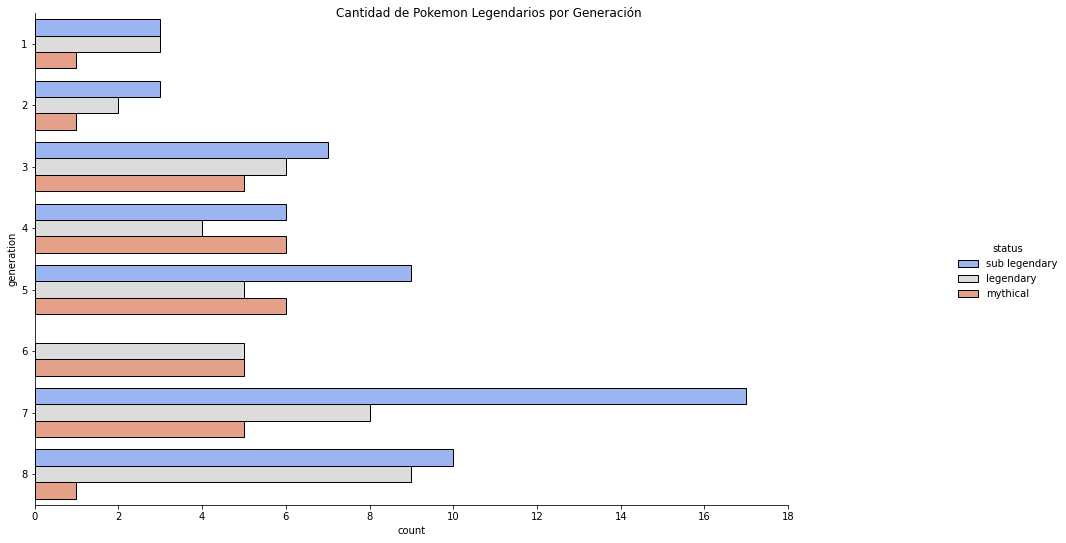

In [117]:
g = sns.catplot( data = df[df["status"] != "normal"] , #aquí pedimos que no traiga normales
               y = "generation",
               kind = "count", #que nos traiga la cantidad
               edgecolor = "black",
               hue = "status", #lo que se está midiendo
               palette = "coolwarm")

g.set(xlim=(0,25)) #ponemos un lmite de visualización

g.fig.set_size_inches(16, 8) #aqupi determinamos el tamalo en pulgadas, siendo cada valor 72 pixeles

g.fig.suptitle("Cantidad de Pokemon Legendarios por Generación")

g.set(xlim=(0,18)) #le ponemos un limite de visualización

## ¿Su poder cambia generación tras generación?

Analizando nos damos cuenta que no podemos simplemente poner el pokemon con más ataque o con más ataque especial porque la idea es poner un pokemon en general poderoso, en este caso podemos tomarlo como el pokemon con la suma de estadisticas más alta

In [118]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'percentage_male', 'weight_kg'],
      dtype='object')

Podemos indagar en las columnas par ver cuales nos llaman la atenciónd de utilidad

In [119]:
stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed']

In [121]:
df["total"] = df[stat_columns].sum(axis=1)

In [122]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg,total
0,1,Bulbasaur,1,normal,grass,poison,0.7,45,49,49,65,65,45,45.0,87.5,6.9,318
1,2,Ivysaur,1,normal,grass,poison,1.0,60,62,63,80,80,60,45.0,87.5,13.0,405
2,3,Venusaur,1,normal,grass,poison,2.0,80,82,83,100,100,80,45.0,87.5,100.0,525
3,3,Mega Venusaur,1,normal,grass,poison,2.4,80,100,123,122,120,80,45.0,87.5,155.5,625
4,4,Charmander,1,normal,fire,none,0.6,39,52,43,60,50,65,45.0,87.5,8.5,309


Text(0.5, 0.98, 'Suma de caracteristicas de Pokemon por generacion')

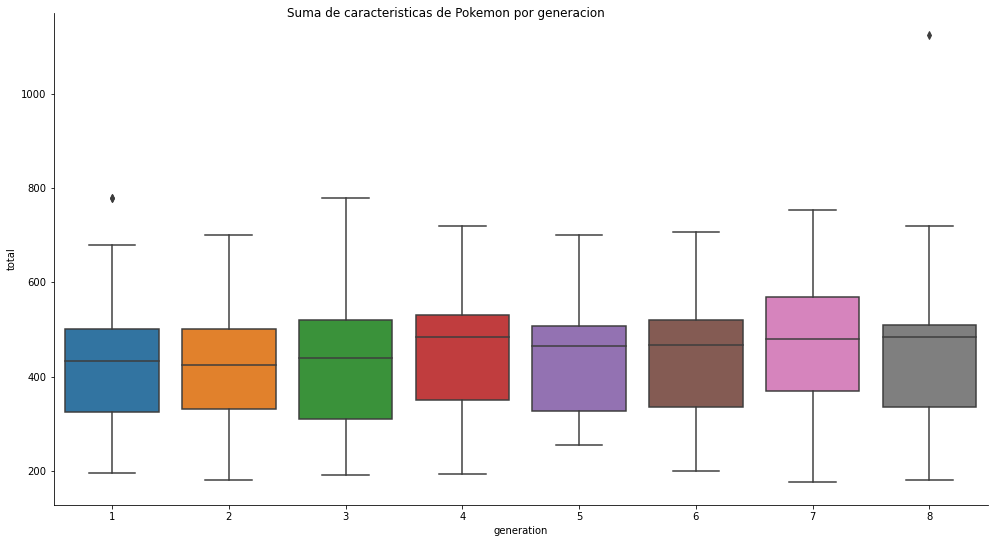

In [128]:
g = sns.catplot( data = df,
                 x = "generation",
                 y = "total",
                 kind = "box"
                )
g.fig.set_size_inches(16,8)

g.fig.suptitle("Suma de caracteristicas de Pokemon por generacion")

Nos podríamos hacer una idea de la distribución, pero parece no ser lo ideal

## ¿Cuál es el tipo de Pokémon más poderoso?

## ¿Cuáles son los pokemon más grandes?, ¿más pesados? y ¿menos densos?

## ¿Cuántos Pokémon son machos y cuántos son hembra?

## ¿Qué pokemon tiene más ataque que defensa y viceversa?